In [1]:
import pandas as pd  
data = pd.read_csv('~/data/trip.csv')
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [2]:
data.shape

(22701, 9)

# Step1. 데이터 전처리
## 1-1. 결측치 판단 및 처리

In [3]:
len(data)-data.count()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [4]:
# 결측치 포함된 행
data[data.isnull().any(axis=1)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


### 결측치 비율
- 전체 0.01% 이므로 결측치 있는 행 삭제로 처리

In [5]:
len(data[data.isnull().any(axis=1)])/data.shape[0]
data.isnull().any(axis=1).mean()

0.0001321527686005022

In [6]:
data.dropna(how='any', inplace=True) # 결측치 삭제
data.shape

(22698, 9)

- 결측치 있던 3행 삭제됨(22698 = 22701-3)


In [7]:
data.isnull().any(axis=1).mean()

0.0

### 중복값 처리

In [8]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [9]:
data[(data['passenger_name']=='Sarah Gross')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [10]:
data[(data['passenger_name']=='Lisa Bullock')]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


- 동일한 시간에 동일한 내용으로 택시요금이 찍힌 것이므로 중복값 삭제

In [11]:
# 나중에 찍힌 값으로 유지
index_to_remove = [16, 203]  
data.drop(index_to_remove, inplace=True)

data.shape

(22696, 9)

In [12]:
data[(data['passenger_name'].isin(['Lisa Bullock', 'Sarah Gross']))]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


## 1-2. 이상치 판단 및 처리

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22696 non-null  object 
 1   tpep_pickup_datetime   22696 non-null  object 
 2   tpep_dropoff_datetime  22696 non-null  object 
 3   payment_method         22696 non-null  object 
 4   passenger_count        22696 non-null  int64  
 5   trip_distance          22696 non-null  float64
 6   fare_amount            22696 non-null  float64
 7   tip_amount             22696 non-null  float64
 8   tolls_amount           22696 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


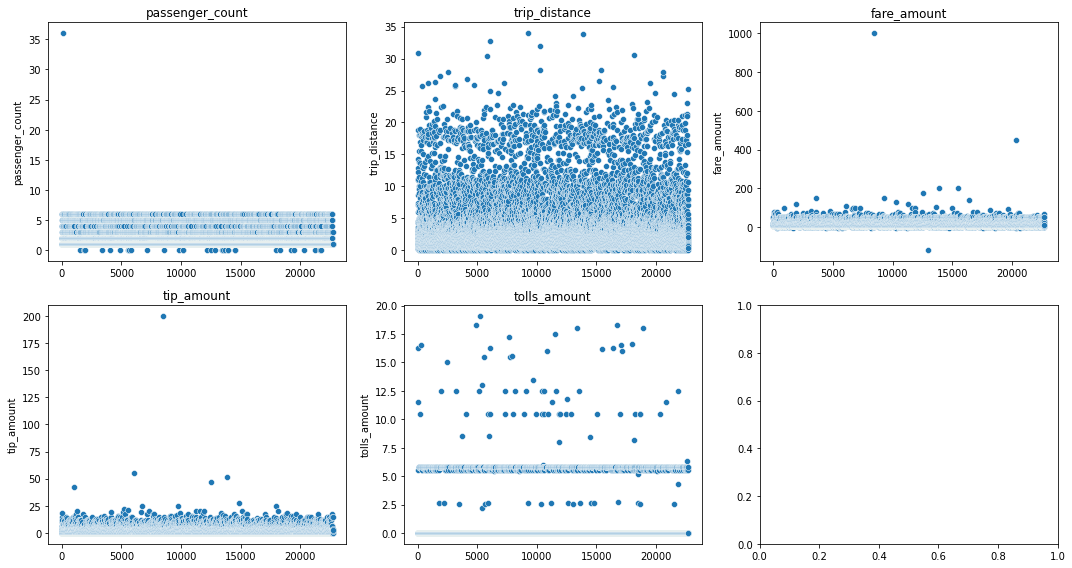

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_num = data[['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 각 산점도 그리기
for i, column in enumerate(data_num.columns):
    row, col = divmod(i, 3)
    sns.scatterplot(x=data.index, y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')


plt.tight_layout()
plt.show()

In [17]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


- 산점도와 통계 요약 내용을 보니    
    - fare_amount(마이너스 요금, 튀는 max), passenger_count(36인승??, 0원 택시)위주 점검 필요
    - 그 외 시간 데이터 계산하여 3분 미만 값이나 10시간 이상 탑승 시간 등 나오면 점검 필요할 것으로 예상

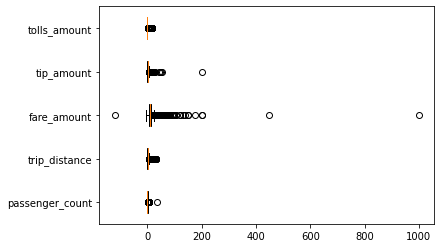

In [18]:
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include='number')


fig, ax = plt.subplots()
ax.boxplot(numeric_columns.values, vert=False, patch_artist=True, labels=numeric_columns.columns, boxprops=dict(facecolor="skyblue"))
plt.show()

🔼 box plot으로도 수치 데이터 점검 해보았다. 이상치가 많아 보인다. 
### 이상치 처리 전 zscore로 이상치 탐색해보기

In [19]:
# 예시 데이터프레임 생성
data_out = data[['fare_amount', 'tip_amount', 'passenger_count']]

# Z 점수 계산 함수
def calculate_z_score(series):
    z_scores = (series - series.mean()) / series.std()
    return z_scores


# Z 점수 기반 이상치 여부 계산 함수
def detect_outliers(z_scores, threshold):
    return np.sum(np.abs(z_scores) > threshold)

result_table = pd.DataFrame(index=['fare_amount', 'tip_amount', 'passenger_count'])

# Z 점수 계산 및 이상치 여부 테이블 생성
thresholds = [1.5, 2, 3]

for variable in data_out.columns:
    z_scores = calculate_z_score(data_out[variable])
    for threshold in thresholds:
        outliers_count = detect_outliers(z_scores, threshold)
        result_table.loc[variable, f'Z : {threshold}'] = outliers_count

# 결과 테이블 출력
result_table.astype(int)

,Z : 1.5,Z : 2,Z : 3
fare_amount,1383,935,145
tip_amount,1209,871,429
passenger_count,2291,1836,693


이상치 찾다가 인덱스 검색이 이상해서 잠시 점검.
- 중복값, 널값 제거하고 인덱스 재배열하기 
    - 지금까지 삭제된 게 5행이라서 인덱스 보기 힘들어서 재배열했다 !
    - 인덱스 재배열을 데이터 전처리 과정마다 해주는 게 편할 것 같다 지금으로선..

In [20]:
# 인덱스 재배열
data = data.reset_index(drop=True)

In [21]:
data[['fare_amount', 'tip_amount', 'passenger_count']].sort_values(by='fare_amount',ascending=False)

,fare_amount,tip_amount,passenger_count
8473,999.99,200.00,1
20309,450.00,0.00,2
13858,200.01,51.64,1
15471,200.00,11.00,1
12508,175.00,46.69,1
...,...,...,...
17599,-4.00,0.00,1
14711,-4.00,0.00,5
20695,-4.50,0.00,1
11201,-4.50,0.00,1


In [22]:
data['passenger_count'].sort_values(ascending=False)

62       36
0         6
7184      6
21860     6
7370      6
         ..
21635     0
21749     0
14516     0
12799     0
12200     0
Name: passenger_count, Length: 22696, dtype: int64

- fare_amount, tip_amount 이상치 있는 행이 동일하다.   
- passenger_count는 큰 택시에 36명 탈 수 있지 않나? 여러 대를 어플같은 걸로 한 번에 계산한건가..?
    - 상식적으로 바로 삭제해도 되는 데이터 같기는 하나, 그래도 거리, 요금 등으로 다른 데이터들과 비교해보고자한다.

1️⃣ 요금 데이터(fare, tip) 이상치 제거

In [23]:
pd.DataFrame(data.iloc[8473])

,8473
passenger_name,Alexis Hanson
tpep_pickup_datetime,02/06/2017 5:50:10 AM
tpep_dropoff_datetime,02/06/2017 5:51:08 AM
payment_method,Credit Card
passenger_count,1
trip_distance,2.6
fare_amount,999.99
tip_amount,200.0
tolls_amount,0.0


- 일단 fare, tip 과한 데이터를 살펴보면
- trip_distance(2.6), passenger_count(1) 같은 조건의 데이터들을 살펴본다
- 하지만 그 전에 이미 탑승시간이 1분 정도 밖에 안 되는 데이터라서 그 시간에 이 금액은 이상치가 확실해 보인다

In [24]:
pd.DataFrame(data[(data['trip_distance']==2.6) & (data['passenger_count']==1)]).describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,116.0,1.160000e+02,116.000000,116.000000,116.0
mean,1.0,2.600000e+00,21.379224,3.521552,0.0
std,0.0,8.920317e-16,91.692124,18.450012,0.0
min,1.0,2.600000e+00,9.000000,0.000000,0.0
25%,1.0,2.600000e+00,11.000000,0.000000,0.0
50%,1.0,2.600000e+00,12.500000,2.250000,0.0
75%,1.0,2.600000e+00,14.000000,2.750000,0.0
max,1.0,2.600000e+00,999.990000,200.000000,0.0


In [25]:
pd.DataFrame(data[(data['trip_distance']==2.6) & (data['passenger_count']==1)])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
131,Sara Williamson,11/24/2017 3:17:47 PM,11/24/2017 3:33:57 PM,Credit Card,1,2.6,13.0,0.00,0.0
158,Christopher Ford,04/21/2017 11:15:54 PM,04/21/2017 11:27:41 PM,Cash,1,2.6,11.0,3.00,0.0
287,Jessica Jones,11/24/2017 5:26:07 PM,11/24/2017 5:51:18 PM,Cash,1,2.6,17.0,0.00,0.0
379,Mary Allen,11/04/2017 4:02:42 AM,11/04/2017 4:10:52 AM,Cash,1,2.6,10.5,0.00,0.0
579,Gerald French,02/19/2017 6:24:22 PM,02/19/2017 6:41:59 PM,Credit Card,1,2.6,13.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
21574,Michael Wallace,07/26/2017 9:28:31 PM,07/26/2017 9:43:14 PM,Debit Card,1,2.6,12.0,2.65,0.0
21781,Caitlyn Herrera,06/13/2017 9:46:35 AM,06/13/2017 10:01:42 AM,Cash,1,2.6,12.5,2.65,0.0
22261,Cynthia Caldwell,12/24/2017 9:20:21 AM,12/24/2017 9:29:33 AM,Debit Card,1,2.6,10.0,2.15,0.0
22284,Ruth Singh,02/25/2017 4:25:39 PM,02/25/2017 4:42:39 PM,Cash,1,2.6,13.0,2.75,0.0


In [26]:
data[data['fare_amount']>=500]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8473,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0


In [27]:
# 이상치 삭제 
index_to_remove = data[data['fare_amount']>=500].index
data.drop(index_to_remove, inplace=True)

In [28]:
data[data['fare_amount']>=500]
# 인덱스 재배열
data = data.reset_index(drop=True)

In [64]:
data[['fare_amount', 'tip_amount', 'passenger_count']].sort_values(by='fare_amount',ascending=False)

,fare_amount,tip_amount,passenger_count
13732,200.01,51.64,1
3543,152.00,0.00,1
9192,150.00,0.00,2
16233,140.00,0.00,1
10193,131.00,0.00,1
...,...,...,...
20636,2.50,0.00,1
16195,2.50,0.00,1
11250,2.50,0.00,2
3694,2.50,0.00,1


- 같은 방식으로 fare_amount에서 이상치 제거 완료

In [30]:
data_out = data[['fare_amount', 'tip_amount', 'passenger_count']]

# Z 점수 계산 함수
def calculate_z_score(series):
    z_scores = (series - series.mean()) / series.std()
    return z_scores


# Z 점수 기반 이상치 여부 계산 함수
def detect_outliers(z_scores, threshold):
    return np.sum(np.abs(z_scores) > threshold)

result_table = pd.DataFrame(index=['fare_amount', 'tip_amount', 'passenger_count'])

# Z 점수 계산 및 이상치 여부 테이블 생성
thresholds = [1.5, 2, 3]

for variable in data_out.columns:
    z_scores = calculate_z_score(data_out[variable])
    for threshold in thresholds:
        outliers_count = detect_outliers(z_scores, threshold)
        result_table.loc[variable, f'Z : {threshold}'] = outliers_count

# 결과 테이블 출력
result_table.astype(int)

,Z : 1.5,Z : 2,Z : 3
fare_amount,1638,1146,727
tip_amount,1391,1026,573
passenger_count,2291,1836,693


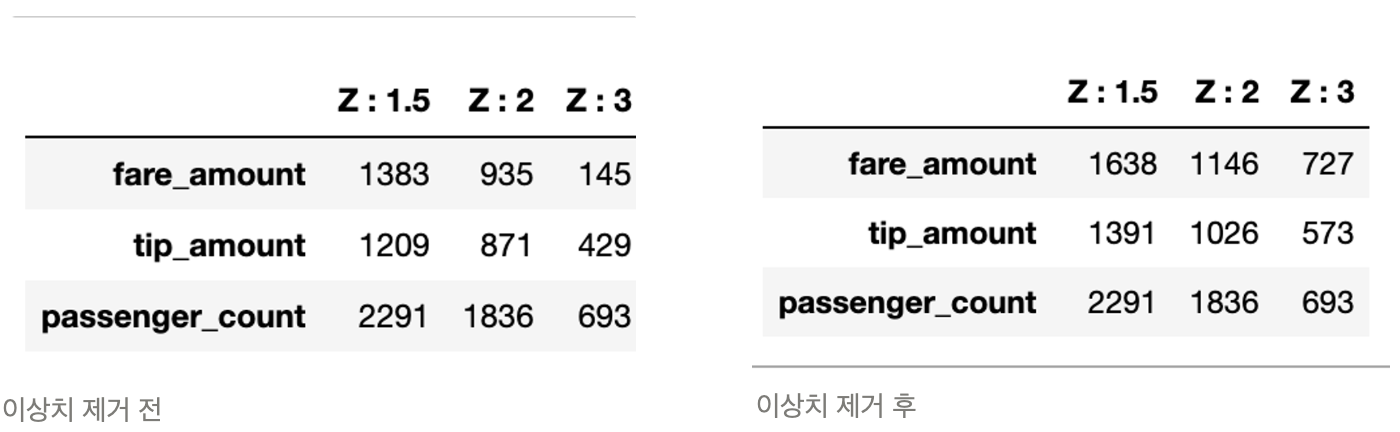

이상치 제거 후에 z-score 하면 이상치 수가 훨씬 줄어들거라고 예상했는데 오히려 수가 많아짐
- 이상치를 제거하면 전체 데이터의 평균과 표준편차가 변한다. 만약 이상치가 높은 값을 갖고 있었다면, 이상치를 제거하면서 평균이 감소하고 표준편차가 작아질 수 있다. 이렇게 되면 남아 있는 정상적인 데이터 포인트들의 Z-점수가 증가할 가능성이 있다고 한다.
- 이상치 없는 정상 데이터 포인터들이 더 큰 z-점수를 갖게 된 것 같다

2️⃣ passenger_count 이상치 제거

In [31]:
data['passenger_count'].sort_values(ascending=False)

62       36
0         6
19968     6
19375     6
4609      6
         ..
13915     0
3349      0
21634     0
13415     0
12199     0
Name: passenger_count, Length: 22695, dtype: int64

In [32]:
pd.DataFrame(data[data['passenger_count'] >= 6]).sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
411,Melanie Wu,02/18/2017 12:44:04 PM,02/18/2017 1:29:10 PM,Debit Card,6,25.69,69.5,14.06,0.00
15992,Crystal Ward,04/23/2017 3:43:18 PM,04/23/2017 4:52:45 PM,Cash,6,23.53,52.0,11.71,5.76
17998,Richard Mathews,04/18/2017 6:59:39 AM,04/18/2017 7:56:51 AM,Cash,6,22.96,52.0,0.00,5.76
4858,Brian Meadows,05/25/2017 10:18:05 PM,05/25/2017 10:52:09 PM,Cash,6,20.03,52.0,0.00,5.76
18747,Sarah Scott,01/18/2017 4:06:20 PM,01/18/2017 5:05:59 PM,Debit Card,6,19.81,62.0,15.95,0.00
...,...,...,...,...,...,...,...,...,...
4620,Cheryl Norton,01/11/2017 2:46:37 PM,01/11/2017 2:48:48 PM,Debit Card,6,0.08,3.5,0.00,0.00
2147,George Owen,07/06/2017 9:13:14 PM,07/06/2017 9:13:18 PM,Cash,6,0.00,2.5,0.95,0.00
9795,Logan Hahn,04/06/2017 6:21:59 PM,04/06/2017 6:22:07 PM,Credit Card,6,0.00,2.5,3.80,0.00
7146,Alexander Robinson,10/18/2017 4:40:49 PM,10/18/2017 4:40:57 PM,Credit Card,6,0.00,2.5,0.00,0.00


In [33]:
data[['fare_amount', 'trip_distance', 'passenger_count']].sort_values(by='trip_distance')

,fare_amount,trip_distance,passenger_count
5144,10.00,0.00,2
7146,2.50,0.00,6
3057,2.50,0.00,3
5192,2.50,0.00,1
1514,59.00,0.00,1
...,...,...,...
29,80.00,30.83,1
10287,131.00,31.95,1
6061,107.00,32.72,1
13857,200.01,33.92,1


In [34]:
pd.DataFrame(data[data['trip_distance'] <= 0]).sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
127,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
13789,Linda Taylor,03/30/2017 11:23:50 AM,03/30/2017 11:23:57 AM,Debit Card,1,0.0,52.0,10.55,0.0
13966,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.0,1.0,0.00,0.0
14058,David Wilson,03/30/2017 7:56:31 PM,03/30/2017 7:56:31 PM,Cash,3,0.0,2.5,0.00,0.0
14161,Sheila Mack,10/29/2017 1:14:35 AM,10/29/2017 1:18:13 AM,Debit Card,1,0.0,4.8,1.32,0.0
...,...,...,...,...,...,...,...,...,...
6572,Michael Hendricks,03/31/2017 5:00:35 PM,03/31/2017 5:01:40 PM,Debit Card,1,0.0,3.0,0.00,0.0
6875,Daniel Martinez,08/17/2017 4:06:26 AM,08/17/2017 4:06:29 AM,Debit Card,4,0.0,98.5,0.00,0.0
6905,Amy Allen,03/26/2017 2:07:08 AM,03/26/2017 2:07:12 AM,Credit Card,1,0.0,18.0,2.00,0.0
7146,Alexander Robinson,10/18/2017 4:40:49 PM,10/18/2017 4:40:57 PM,Credit Card,6,0.0,2.5,0.00,0.0


 3️⃣ distance 이상치 제거   
 
 - 살펴보다보니 거리에서도 이상치 보여 0이하 값들 등 이상치 제거

In [35]:
dist_zero = data[data['trip_distance']==0].index
data.drop(dist_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [36]:
data[data['trip_distance']==0].index

Int64Index([], dtype='int64')

In [37]:
dist_zero = data[data['fare_amount']<=0].index
data.iloc[dist_zero]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
308,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1626,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4365,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4386,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5403,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5709,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8142,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
11123,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12851,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14609,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [38]:
# 요금 0~마이너스 행 제거
fare_zero = data[data['fare_amount']<=0].index
data.drop(fare_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [39]:
passenger_zero = data[data['passenger_count']<=0].index
data.iloc[passenger_zero]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1497,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1851,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1902,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3320,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4022,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4874,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5513,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5552,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5615,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5712,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [40]:
# 승객 0~마이너스 행 제거
data.drop(passenger_zero, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [41]:
passenger_out = data[data['passenger_count']>6].index
data.iloc[passenger_out]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
62,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [42]:
passenger_6 = data[(data['passenger_count'] >= 6) & (20 <= data['fare_amount']) & (data['fare_amount'] < 25)].index
data.iloc[passenger_6]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
62,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.00,0.00
110,Eric Duarte,11/17/2017 12:01:00 PM,11/17/2017 12:24:22 PM,Debit Card,6,6.25,22.5,4.66,0.00
547,Dorothy Jenkins,09/26/2017 3:09:16 PM,09/26/2017 3:36:19 PM,Cash,6,6.17,24.5,5.06,0.00
1088,Omar Clay,02/10/2017 12:41:07 PM,02/10/2017 1:07:16 PM,Cash,6,6.89,24.5,1.00,0.00
1180,Brittany Tyler,09/26/2017 12:38:07 PM,09/26/2017 1:01:41 PM,Credit Card,6,6.52,24.0,0.00,0.00
2066,Dennis Baker,06/04/2017 1:25:57 PM,06/04/2017 1:59:26 PM,Debit Card,6,5.03,23.0,5.00,0.00
2134,Courtney Howard,01/12/2017 1:11:03 AM,01/12/2017 1:31:21 AM,Cash,6,6.45,21.0,0.00,0.00
4197,Cody Murphy,03/22/2017 9:15:51 AM,03/22/2017 9:50:17 AM,Debit Card,6,5.02,23.0,3.00,0.00
4518,Bruce Bell,12/17/2017 7:07:00 AM,12/17/2017 7:23:43 AM,Credit Card,6,6.75,21.0,0.00,0.00
5118,Lisa Mendoza,07/30/2017 6:48:48 PM,07/30/2017 7:13:10 PM,Debit Card,6,6.89,23.5,4.00,0.00


In [43]:
data.iloc[passenger_6].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,6.882353,5.758824,22.250000,2.375294,0.664706
std,5.144958,1.557165,1.442063,2.333315,1.848144
min,6.000000,0.220000,20.000000,0.000000,0.000000
25%,6.000000,5.040000,21.000000,0.000000,0.000000
50%,6.000000,5.930000,22.500000,2.500000,0.000000
75%,6.000000,6.765000,23.000000,4.660000,0.000000
max,36.000000,8.080000,24.500000,6.110000,5.760000


### 이상치 제거 - Passenger 36
    - 다 끝나고 보니 바로 삭제했어도 됐을 데이터
    - 다른 항목들과 비교해 본 내역

In [44]:
# 36인승 택시 행 제거
passenger_36 = data[data['passenger_count']==36].index
data.drop(passenger_36, inplace=True)

# 인덱스 재배열
data = data.reset_index(drop=True)

In [45]:
trip_022 = data[data['trip_distance']==0.22].index
data.iloc[trip_022]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
11163,Kevin Hicks,11/03/2017 2:36:18 PM,11/03/2017 2:37:58 PM,Cash,1,0.22,3.0,0.00,0.0
11918,Norman Price,09/09/2017 10:54:04 PM,09/09/2017 10:56:35 PM,Cash,1,0.22,3.5,0.00,0.0
13431,Kathleen Holland,06/26/2017 9:00:16 AM,06/26/2017 9:01:21 AM,Credit Card,2,0.22,3.0,0.76,0.0
22139,Brandon Mitchell,11/02/2017 7:10:40 PM,11/02/2017 7:19:26 PM,Credit Card,1,0.22,6.5,1.66,0.0


In [46]:
data.iloc[trip_022].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,4.00,4.00,4.000000,4.000000,4.0
mean,1.25,0.22,4.000000,0.605000,0.0
std,0.50,0.00,1.683251,0.789325,0.0
min,1.00,0.22,3.000000,0.000000,0.0
25%,1.00,0.22,3.000000,0.000000,0.0
50%,1.00,0.22,3.250000,0.380000,0.0
75%,1.25,0.22,4.250000,0.985000,0.0
max,2.00,0.22,6.500000,1.660000,0.0


In [47]:
fare_20 = data[(data['fare_amount']>20) & (data['fare_amount']<22)].index
data.iloc[fare_20].sort_values(by='trip_distance', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16030,Christopher Cooper,07/05/2017 12:16:55 AM,07/05/2017 12:29:23 AM,Debit Card,2,7.40,21.5,0.00,0.00
20073,Bailey Ellis,02/20/2017 9:23:18 PM,02/20/2017 9:38:15 PM,Debit Card,2,7.39,21.5,7.08,5.54
2166,Michael Gonzalez,03/07/2017 10:25:28 PM,03/07/2017 10:39:41 PM,Debit Card,2,7.33,21.5,0.00,0.00
8453,Marie Oneal,06/25/2017 9:01:04 AM,06/25/2017 9:11:29 AM,Cash,1,7.31,21.0,2.00,5.76
12807,Mrs. Debra Smith,11/25/2017 3:11:37 AM,11/25/2017 3:24:41 AM,Cash,1,7.30,21.5,3.00,0.00
...,...,...,...,...,...,...,...,...,...
512,Richard Pearson,11/14/2017 11:15:25 AM,11/14/2017 11:49:42 AM,Debit Card,5,2.27,20.5,3.00,0.00
9783,Tracey Waller,09/19/2017 1:42:48 PM,09/19/2017 2:20:02 PM,Cash,1,2.00,21.5,0.00,0.00
7266,Sara Anderson,03/16/2017 3:05:55 PM,03/16/2017 3:43:16 PM,Credit Card,5,1.61,21.0,4.36,0.00
21039,Daniel Anderson,12/14/2017 2:38:54 PM,12/14/2017 3:16:46 PM,Cash,1,1.24,21.5,0.00,0.00


In [48]:
data.iloc[fare_20].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,1.668524,5.185738,20.973538,2.776212,0.174039
std,1.227654,1.267517,0.411085,2.229568,0.980445
min,1.000000,0.030000,20.500000,0.000000,0.000000
25%,1.000000,4.405000,20.500000,0.000000,0.000000
50%,1.000000,5.330000,21.000000,4.000000,0.000000
75%,2.000000,6.100000,21.500000,4.460000,0.000000
max,6.000000,7.400000,21.500000,8.000000,5.760000


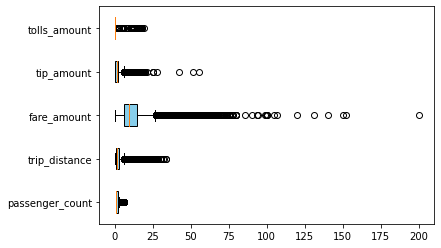

In [49]:
numeric_columns = data.select_dtypes(include='number')


fig, ax = plt.subplots()
ax.boxplot(numeric_columns.values, vert=False, patch_artist=True, labels=numeric_columns.columns, boxprops=dict(facecolor="skyblue"))
plt.show()

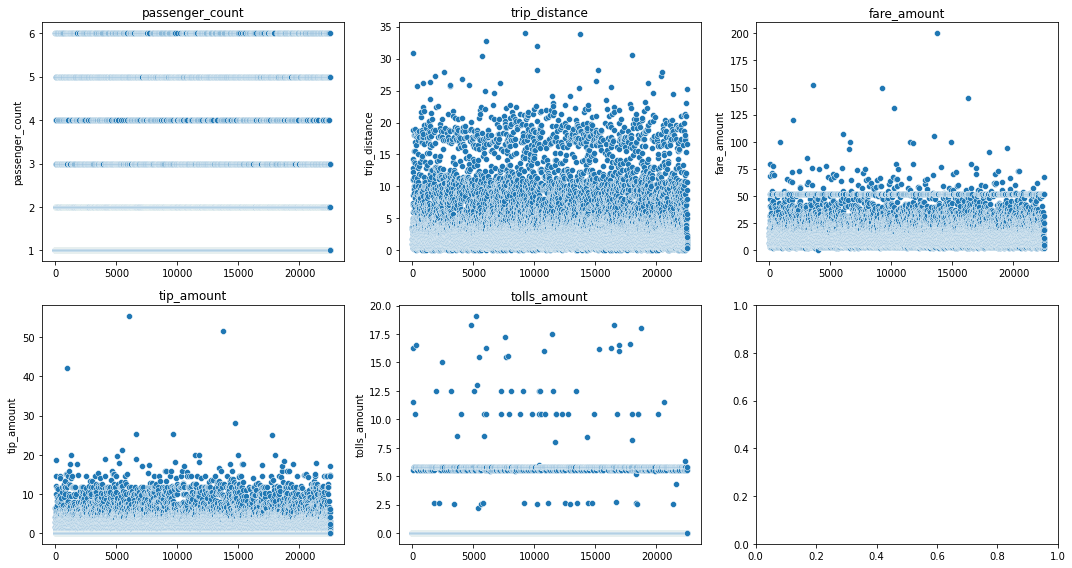

In [50]:
data_new = data[['passenger_count','trip_distance','fare_amount','tip_amount','tolls_amount']]

# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# 각 산점도 그리기
for i, column in enumerate(data_new.columns):
    row, col = divmod(i, 3)
    sns.scatterplot(x=data.index, y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')


plt.tight_layout()
plt.show()

- 산점도와 boxplot으로 이상치 제거 후 전체 분포 확인

In [51]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22498.000000,22498.000000,22498.000000,22498.000000,22498.000000
mean,1.645969,2.932639,12.930555,1.822006,0.309303
std,1.285649,3.656104,10.825914,2.431934,1.385418
min,1.000000,0.010000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,200.010000,55.500000,19.100000


# Step 2. 데이터 전처리 심화
## 2.1 Replace
- Credit Card, Debit Card 구분없이 "Card"로!!

In [52]:
data['payment_method'].replace({'Credit Card' : 'Card', 'Debit Card' : 'Card'}, inplace=True)

In [53]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22493,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22494,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22495,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Card,1,0.42,4.5,0.00,0.00
22496,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Card,1,2.36,10.5,1.70,0.00


In [54]:
data['payment_method'].unique()

array(['Card', 'Cash'], dtype=object)

In [55]:
data.sort_values(by='tip_amount', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
5997,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Card,1,32.72,107.00,55.50,16.26
13732,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Card,1,33.92,200.01,51.64,5.76
968,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.00,42.29,0.00
14685,John Greer,11/28/2017 8:47:09 PM,11/28/2017 9:22:38 PM,Card,1,20.90,57.50,28.00,2.64
6638,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Card,1,0.32,100.00,25.20,0.00
...,...,...,...,...,...,...,...,...,...
9336,Darrell Santiago,06/07/2017 8:33:40 AM,06/07/2017 8:46:27 AM,Card,1,1.08,9.00,0.00,0.00
9337,Charles Harding,01/19/2017 7:26:14 PM,01/19/2017 7:38:23 PM,Cash,1,4.74,15.50,0.00,0.00
15768,Nancy Baker,04/08/2017 7:37:31 PM,04/08/2017 7:54:53 PM,Card,1,1.30,11.50,0.00,0.00
9338,Steven Garcia DVM,09/04/2017 7:09:07 PM,09/04/2017 7:12:10 PM,Card,2,0.83,4.50,0.00,0.00


In [82]:
data.sort_values(by='passenger_count', ascending=True)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time
22496,Benjamin Miller,2017-03-02 13:02:49,2017-03-02 13:16:09,Cash,1,2.10,11.0,2.35,0.00,0 days 00:13:20
12328,Jean Heath,2017-11-08 12:17:45,2017-11-08 13:15:53,Cash,1,11.60,46.5,0.00,5.76,0 days 00:58:08
12329,Michael Klein,2017-08-26 05:45:42,2017-08-26 05:48:41,Cash,1,1.00,5.0,1.00,0.00,0 days 00:02:59
12330,Jonathan Parker,2017-10-11 16:39:18,2017-10-11 16:48:56,Card,1,1.65,8.5,2.58,0.00,0 days 00:09:38
12331,Michael Smith,2017-07-18 13:34:08,2017-07-18 13:43:50,Cash,1,0.70,7.5,1.65,0.00,0 days 00:09:42
...,...,...,...,...,...,...,...,...,...,...
17833,Francis Rodriguez,2017-12-03 21:20:32,2017-12-03 21:23:23,Cash,6,1.35,5.5,1.36,0.00,0 days 00:02:51
3208,Catherine Carter,2017-03-26 12:06:26,2017-03-26 12:12:15,Card,6,0.83,5.0,1.16,0.00,0 days 00:05:49
17828,Robert Peterson,2017-08-03 11:09:56,2017-08-03 11:13:02,Card,6,0.38,4.0,0.00,0.00,0 days 00:03:06
3260,Kelly Jones,2017-04-12 23:45:33,2017-04-13 00:07:53,Card,6,3.19,16.0,0.00,0.00,0 days 00:22:20


## 2.2 상관관계, 시간데이터 전처리
### 2.2.1 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계
- 이상치 발견, 삭제

In [57]:
!pip install -q koreanize-matplotlib
import koreanize_matplotlib

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22498 non-null  object 
 1   tpep_pickup_datetime   22498 non-null  object 
 2   tpep_dropoff_datetime  22498 non-null  object 
 3   payment_method         22498 non-null  object 
 4   passenger_count        22498 non-null  int64  
 5   trip_distance          22498 non-null  float64
 6   fare_amount            22498 non-null  float64
 7   tip_amount             22498 non-null  float64
 8   tolls_amount           22498 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [83]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

comparison_result = data['tpep_dropoff_datetime'] < data['tpep_pickup_datetime']
data[comparison_result]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time


- 시간 차 및 대소 비교 위해 데이터 타입 변경
- 변경 후 살펴보니 내린 시간이 탄 시간보다 이른 데이터가 보였다.
- 그 외에도 너무 짧게 탑승한 시간 등도 찾을 수 있겠다

In [75]:
# 탑승시간 열 생성(boarding_time)
data['boarding_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data.sort_values(by='boarding_time', ascending='False')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time
20005,Pamela Yates,2017-09-16 14:30:38,2017-09-16 14:30:39,Card,2,1.67,12.5,3.99,0.0,0 days 00:00:01
21405,Timothy Ramirez,2017-04-14 21:18:30,2017-04-14 21:18:32,Card,1,1.20,2.5,0.00,0.0,0 days 00:00:02
21905,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.0,0 days 00:00:02
13183,Chelsea Smith,2017-05-16 18:30:45,2017-05-16 18:30:47,Cash,1,8.40,2.5,0.00,0.0,0 days 00:00:02
7092,Vincent Richardson,2017-03-07 16:42:46,2017-03-07 16:42:48,Cash,1,0.20,52.0,17.19,0.0,0 days 00:00:02
...,...,...,...,...,...,...,...,...,...,...
15021,Katelyn Greer,2017-04-13 23:41:09,2017-04-14 23:39:42,Cash,2,1.99,7.0,0.00,0.0,0 days 23:58:33
22437,Margaret Conner,2017-04-03 21:02:49,2017-04-04 21:01:28,Card,1,1.73,9.0,0.00,0.0,0 days 23:58:39
14857,Jennifer Wilson,2017-07-31 14:04:25,2017-08-01 14:03:16,Cash,5,0.95,8.0,1.76,0.0,0 days 23:58:51
15435,Ashley Holmes,2017-05-10 18:53:53,2017-05-11 18:53:02,Cash,5,0.74,7.0,0.00,0.0,0 days 23:59:09


In [76]:
data.shape #(22497, 10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22497 entries, 0 to 22496
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22497 non-null  object         
 1   tpep_pickup_datetime   22497 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22497 non-null  datetime64[ns] 
 3   payment_method         22497 non-null  object         
 4   passenger_count        22497 non-null  int64          
 5   trip_distance          22497 non-null  float64        
 6   fare_amount            22497 non-null  float64        
 7   tip_amount             22497 non-null  float64        
 8   tolls_amount           22497 non-null  float64        
 9   boarding_time          22497 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 1.7+ MB


In [79]:
# -날짜(마이너스 날짜!) 제거
data = data[data['boarding_time'] >= pd.Timedelta(0)]

# 인덱스 재배열
data = data.reset_index(drop=True)

In [84]:
data.shape
# 0 이하 날짜는 더 이상 없, 1개 삭제됨

(22497, 10)

### 2.2.2 상관관계 분석
 - 당연히 주행시간 요금 간 양 선형관계 있을 것 같았는데 아니다
 - 아무래도 여기서 보니 주행 시간에도 이상치가 있는 것 같아 상관관계에 영향을 미친 것 같아 확인 후 삭제

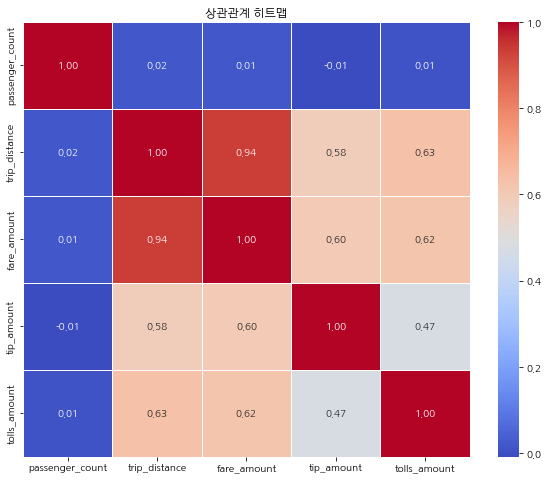

In [85]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관관계 히트맵')
plt.show()

<AxesSubplot:ylabel='boarding_time'>

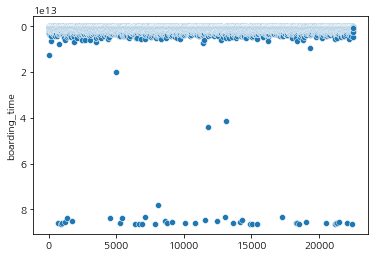

In [88]:
sns.scatterplot(x=data.index, y=data['boarding_time'])
# 데이터가 이상하게 보여서 그래프 수치 조정 후 다시 그리기

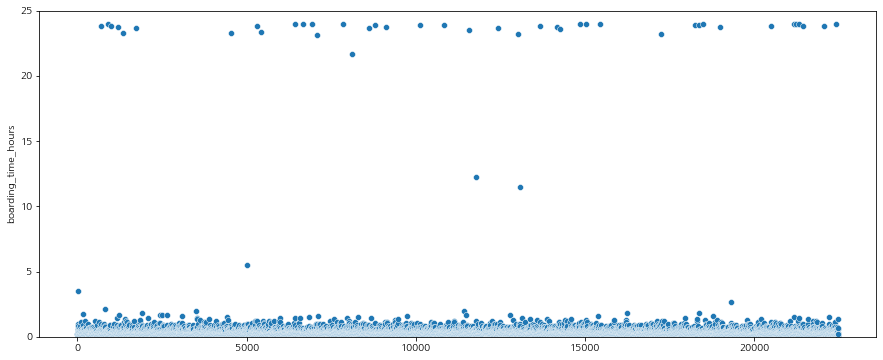

In [87]:
data['boarding_time_hours'] = data['boarding_time'].dt.total_seconds() / 3600

plt.figure(figsize=(15, 6))
sns.scatterplot(x=data.index, y=data['boarding_time_hours'])

plt.ylim(0, 25)

plt.show()


- 5시간 이상 탑승이 가능은 할 것 같으나
- 요금을 보고 이상치인지 실제 10시간 이상 탑승인지 확인해봐야겠다

In [90]:
data[data['boarding_time_hours']<(1/60)]
# 1분 미만 탑승 고객도 있네..

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours
158,Jonathan Flores,2017-11-11 20:16:16,2017-11-11 20:17:14,Card,1,0.23,52.0,0.00,0.0,0 days 00:00:58,0.016111
314,Valerie Mullen,2017-01-14 19:04:51,2017-01-14 19:05:01,Cash,2,0.02,2.5,0.00,0.0,0 days 00:00:10,0.002778
1059,Kyle Johnson,2017-04-12 20:51:58,2017-04-12 20:52:07,Cash,1,2.30,2.5,0.00,0.0,0 days 00:00:09,0.002500
1320,Amy Patterson MD,2017-03-05 21:46:08,2017-03-05 21:47:04,Cash,1,0.37,3.0,0.00,0.0,0 days 00:00:56,0.015556
1474,Laura Hayes,2017-01-07 09:50:58,2017-01-07 09:51:57,Card,1,0.40,3.5,2.00,0.0,0 days 00:00:59,0.016389
...,...,...,...,...,...,...,...,...,...,...,...
21839,Michael Singleton,2017-12-10 12:20:19,2017-12-10 12:20:56,Cash,1,0.09,2.5,0.00,0.0,0 days 00:00:37,0.010278
21905,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.0,0 days 00:00:02,0.000556
22189,Jean Smith,2017-01-26 18:06:06,2017-01-26 18:06:58,Card,1,0.30,3.0,1.00,0.0,0 days 00:00:52,0.014444
22323,Lisa Jacobs,2017-04-26 19:03:15,2017-04-26 19:03:38,Card,2,0.08,2.5,1.29,0.0,0 days 00:00:23,0.006389


In [91]:
len(data[data['boarding_time_hours']<(1/60)]) # 83
len(data[data['boarding_time_hours']<(2/60)]) # 380

380

In [93]:
data = data[data['boarding_time_hours']>=(2/60)]
# 2분 이하 탑승 데이터 제거

In [94]:
data['total_fare'] = data['fare_amount']+data['tolls_amount']+data['tip_amount']

In [95]:
data_over = data[data['boarding_time_hours']>5]

In [96]:
data_over.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare
count,44.000000,44.000000,44.000000,44.000000,44.000000,44,44.000000,44.000000
mean,2.045455,3.830455,17.136364,1.574773,0.382727,0 days 22:45:29.454545454,22.758182,19.093864
std,1.697530,4.242106,12.991663,2.941901,1.431503,0 days 03:39:51.514114224,3.664309,16.069730
min,1.000000,0.330000,4.500000,0.000000,0.000000,0 days 05:32:07,5.535278,4.500000
25%,1.000000,1.252500,8.375000,0.000000,0.000000,0 days 23:34:16,23.571111,9.570000
50%,1.000000,2.030000,13.250000,0.000000,0.000000,0 days 23:50:26,23.840556,14.215000
75%,3.000000,4.400000,19.750000,2.070000,0.000000,0 days 23:56:32.500000,23.942361,20.815000
max,6.000000,19.760000,52.000000,11.370000,5.760000,0 days 23:59:33,23.992500,67.410000


In [97]:
data_normal = data[data['boarding_time_hours']<=5]
data_normal.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare
count,22073.000000,22073.000000,22073.000000,22073.000000,22073.000000,22073,22073.000000,22073.000000
mean,1.647443,2.971775,13.034020,1.838657,0.312157,0 days 00:14:38.896751687,0.244138,15.184834
std,1.285680,3.669837,10.732092,2.428536,1.392375,0 days 00:11:37.207391576,0.193669,13.275371
min,1.000000,0.020000,0.010000,0.000000,0.000000,0 days 00:02:00,0.033333,3.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000,0 days 00:06:56,0.115556,7.500000
50%,1.000000,1.680000,9.500000,1.360000,0.000000,0 days 00:11:23,0.189722,11.000000
75%,2.000000,3.100000,14.500000,2.450000,0.000000,0 days 00:18:33,0.309167,16.950000
max,6.000000,33.960000,200.010000,55.500000,19.100000,0 days 03:29:10,3.486111,257.410000


In [98]:
data_over

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare
683,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Card,1,1.36,8.5,1.47,0.00,0 days 23:50:50,23.847222,9.97
908,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,0 days 23:59:33,23.992500,17.50
994,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,0 days 23:50:02,23.833889,4.50
1183,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Card,1,4.14,18.0,3.76,0.00,0 days 23:44:51,23.747500,21.76
1336,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,0 days 23:19:24,23.323333,15.00
1734,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,0 days 23:40:21,23.672500,8.66
4552,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,0 days 23:14:53,23.248056,10.00
4999,Manuel Haynes,2017-08-07 18:27:53,2017-08-08 00:00:00,Cash,1,14.35,50.5,10.46,0.00,0 days 05:32:07,5.535278,60.96
5314,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,0 days 23:51:04,23.851111,14.07
5421,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Card,1,0.62,5.5,0.00,0.00,0 days 23:19:59,23.333056,5.50


- 이상치 근거
    - 주행시간과 택시 요금은 비례해야 한다. ( 정비례까진 아니더라도 )
    - 오히려 주행시간이 길어졌음에도 요금이 더 작음

In [99]:
print(data_normal['trip_distance'].mean()) # 2.9308734188491004
print(data_normal['trip_distance'].median()) # 1.63

print(data_normal['total_fare'].mean()) # 15.053889185818635
print(data_normal['total_fare'].median()) #11

2.971775472296471
1.68
15.18483396004168
11.0


In [100]:
print(data_over['trip_distance'].mean()) # 3.830454545454546
print(data_over['trip_distance'].median()) # 2.0300000000000002

print(data_over['total_fare'].mean()) # 19.093863636363636
print(data_over['total_fare'].median()) #14.215
data_over.iloc[:, 8:].describe()

3.830454545454546
2.0300000000000002
19.093863636363636
14.215


,tolls_amount,boarding_time,boarding_time_hours,total_fare
count,44.000000,44,44.000000,44.000000
mean,0.382727,0 days 22:45:29.454545454,22.758182,19.093864
std,1.431503,0 days 03:39:51.514114224,3.664309,16.069730
min,0.000000,0 days 05:32:07,5.535278,4.500000
25%,0.000000,0 days 23:34:16,23.571111,9.570000
50%,0.000000,0 days 23:50:26,23.840556,14.215000
75%,0.000000,0 days 23:56:32.500000,23.942361,20.815000
max,5.760000,0 days 23:59:33,23.992500,67.410000


In [102]:
data_normal['hourly_fare'] = data_normal['total_fare'] / data_normal['boarding_time_hours']
data_normal.iloc[:, 8:].describe()

/tmp/ipykernel_47/4051346571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal['hourly_fare'] = data_normal['total_fare'] / data_normal['boarding_time_hours']


,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
count,22073.000000,22073,22073.000000,22073.000000,22073.000000
mean,0.312157,0 days 00:14:38.896751687,0.244138,15.184834,66.057339
std,1.392375,0 days 00:11:37.207391576,0.193669,13.275371,26.075953
min,0.000000,0 days 00:02:00,0.033333,3.000000,15.402567
25%,0.000000,0 days 00:06:56,0.115556,7.500000,51.873199
50%,0.000000,0 days 00:11:23,0.189722,11.000000,61.407044
75%,0.000000,0 days 00:18:33,0.309167,16.950000,74.647808
max,19.100000,0 days 03:29:10,3.486111,257.410000,1623.740260


In [108]:
data_over['hourly_fare'] = data_over['total_fare'] / data_over['boarding_time_hours']

/tmp/ipykernel_47/3326304973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_over['hourly_fare'] = data_over['total_fare'] / data_over['boarding_time_hours']


In [109]:
data_normal['hourly_fare'].describe()

count    22073.000000
mean        66.057339
std         26.075953
min         15.402567
25%         51.873199
50%         61.407044
75%         74.647808
max       1623.740260
Name: hourly_fare, dtype: float64

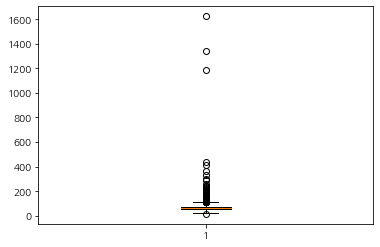

In [110]:
fig, ax = plt.subplots()
ax.boxplot(data_normal['hourly_fare'])
plt.show()

In [119]:
top_3_rows = data_over.sort_values(by='hourly_fare', ascending=False).head(3)
top_3_rows

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
4999,Manuel Haynes,2017-08-07 18:27:53,2017-08-08,Cash,1,14.35,50.5,10.46,0.00,0 days 05:32:07,5.535278,60.96,11.012997
11775,Patricia Wilkinson,2017-03-16 11:43:57,2017-03-17,Card,1,7.53,50.5,11.37,5.54,0 days 12:16:03,12.267500,67.41,5.495007
13096,Amber Edwards,2017-01-08 12:30:07,2017-01-09,Card,1,12.53,36.0,8.47,5.54,0 days 11:29:53,11.498056,50.01,4.349431


In [121]:
# 상위 3개 이상치 제거
data = data.drop(top_3_rows.index)

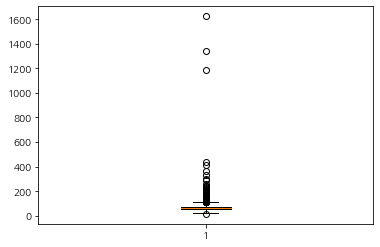

In [117]:
fig, ax = plt.subplots()
ax.boxplot(data_normal['hourly_fare'])
plt.show()

In [116]:
data_over['hourly_fare'].describe()

count    44.000000
mean      1.107018
std       1.838241
min       0.188807
25%       0.399082
50%       0.604222
75%       0.881912
max      11.012997
Name: hourly_fare, dtype: float64

In [115]:
data_normal.sort_values(by='boarding_time_hours')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,boarding_time,boarding_time_hours,total_fare,hourly_fare
7358,Kimberly Colon,2017-01-22 05:05:24,2017-01-22 05:07:24,Card,2,0.42,3.5,1.44,0.00,0 days 00:02:00,0.033333,4.94,148.200000
4161,Heather Erickson,2017-09-03 22:32:30,2017-09-03 22:34:30,Card,1,0.74,4.0,0.00,0.00,0 days 00:02:00,0.033333,4.00,120.000000
4311,Vicki Rodriguez,2017-01-20 09:14:23,2017-01-20 09:16:23,Cash,1,0.31,3.5,0.86,0.00,0 days 00:02:00,0.033333,4.36,130.800000
8480,Raymond Summers,2017-06-11 07:46:18,2017-06-11 07:48:18,Card,3,1.14,5.0,1.00,0.00,0 days 00:02:00,0.033333,6.00,180.000000
13248,Rick Johnson,2017-06-01 19:18:21,2017-06-01 19:20:21,Card,1,0.55,4.0,1.16,0.00,0 days 00:02:00,0.033333,5.16,154.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,George Garcia,2017-12-07 06:42:55,2017-12-07 08:39:45,Card,6,13.45,75.5,15.26,0.00,0 days 01:56:50,1.947222,90.76,46.609986
11433,Deanna Kelley,2017-06-09 15:25:48,2017-06-09 17:24:40,Card,2,24.20,52.0,20.00,5.76,0 days 01:58:52,1.981111,77.76,39.250701
803,Justin Jenkins,2017-06-20 08:15:18,2017-06-20 10:24:37,Cash,1,17.77,52.0,11.71,5.76,0 days 02:09:19,2.155278,69.47,32.232504
19315,Jeremy Thompson PhD,2017-04-26 08:31:31,2017-04-26 11:10:50,Card,1,26.12,52.0,0.00,5.76,0 days 02:39:19,2.655278,57.76,21.752903


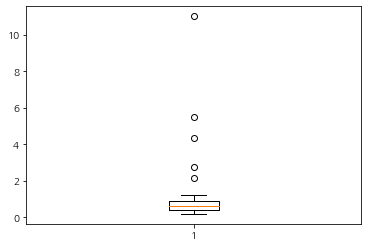

In [114]:
fig, ax = plt.subplots()
ax.boxplot(data_over['hourly_fare'])
plt.show()

In [113]:
data = data[data['boarding_time_hours']<20]

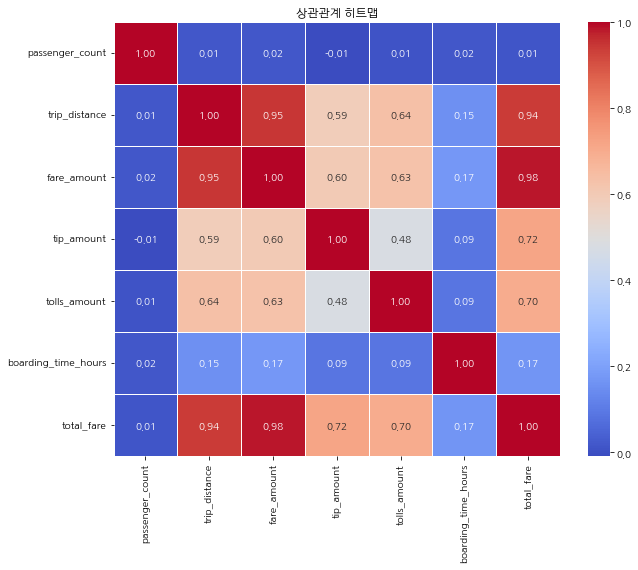

In [112]:
# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('상관관계 히트맵')
plt.show()

### 상관관계
- (fare_amount, trip_distance) : 0.95
- (total_fare, trip_distance) : 0.94
    - (total_fare, fare_amount) : 0.98 => 조정한거라 당연히 높음
- 그 외 상관관계로는 기간과 요금이 비례함을 알 수 있었당

### 회고

- 데이터 전처리 & 이상치 감지
    - 다양한 전처리 기법을 사용하여 데이터 탐색, 이상치 식별은 데이터 품질 향상에 도움 된다
    - 특히, 타임 데이터의 경우 시간적 흐름을 고려하여 정제하는 것이 중요하다   
    
- 상관관계 분석과 가설 검증
    - 상관관계 분석으로 변수 간 관계를 탐색할 수 있다. 
    - 가설을 세우고 검증하는 과정에서 놓쳤던 이상치를 찾을 수도 있다.
    - 가설을 세우고 검증하는 데에는 도메인 지식이 큰 도움이 될 것 같다. 오늘같은 데이터는 일반적이지만 더 전문적인 데이터를 다룬다면 데이터 의미와 함께 가설을 검증하면 놓칠 수 있는 이상치를 찾을 수 있다   
    
- 통계적 분석과 인사이트 탐구
    - 통계적인 지식을 통해 인사이트를 발견하고 탐구해볼 수 있을 것 같다
    - 도메인 지식과 함께 필요할 듯 하다..